In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [153]:
tweets = pd.read_csv("train.csv")
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Relacion entre la ubicacion y la veracidad de los tweets

In [154]:
# tweets["location"] == tweets["location"] devuelve false si es un NaN

tweets["located"] = tweets["location"] == tweets["location"]
tweets.loc[tweets["located"] == True,"located"] = 1
tweets.loc[tweets["located"] == False ,"located"] = 0
tweets.head(100)

,id,keyword,location,text,target,located
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0
...,...,...,...,...,...,...
95,137,accident,Charlotte,9 Mile backup on I-77 South...accident blockin...,1,1
96,138,accident,"Baton Rouge, LA",Has an accident changed your life? We will hel...,0,1
97,139,accident,"Hagerstown, MD",#BREAKING: there was a deadly motorcycle car a...,1,1
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0,1


In [155]:
grouped = tweets.groupby(["target","located"]).agg({"target":["count"]})
grouped.columns = ["count"]
grouped.head()

count
target located       
0      0         1458
       1         2884
1      0         1075
       1         2196

In [156]:
grouped2 = grouped.reset_index()
grouped2.head()

,target,located,count
0,0,0,1458
1,0,1,2884
2,1,0,1075
3,1,1,2196


In [157]:
pivoted= grouped2.pivot("target","located")
pivoted

count      
located     0     1
target             
0        1458  2884
1        1075  2196

[Text(0, 0.5, 'Falso'), Text(0, 1.5, 'Verdadero')]

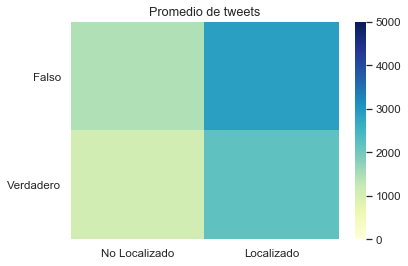

In [158]:

ax = sns.heatmap(pivoted,vmin=0, vmax=5000,cmap="YlGnBu",xticklabels=["No Localizado","Localizado"],yticklabels=["Falso","Verdadero"])
ax.set(xlabel= "",ylabel = "",title= "Promedio de tweets")
ax.set_yticklabels(ax.get_yticklabels(), rotation =0)

Analisis de la cantidad de la cantidad de paises que tienen la misma ubicacion


In [159]:
grouped2 = tweets.groupby("location").agg({"target":"sum","located":"sum"})
grouped2 = grouped2.nlargest(10,"located")
grouped2

,target,located
location,,
USA,67,104
New York,16,71
United States,27,50
London,16,45
Canada,13,29
Nigeria,22,28
UK,16,27
"Los Angeles, CA",8,26
India,20,24


In [160]:
grouped2.rename(columns={"target": "true"},inplace=True)
grouped2["false"] = grouped2["located"]-grouped2["true"] 
grouped2

,true,located,false
location,,,
USA,67,104,37
New York,16,71,55
United States,27,50,23
London,16,45,29
Canada,13,29,16
Nigeria,22,28,6
UK,16,27,11
"Los Angeles, CA",8,26,18
India,20,24,4


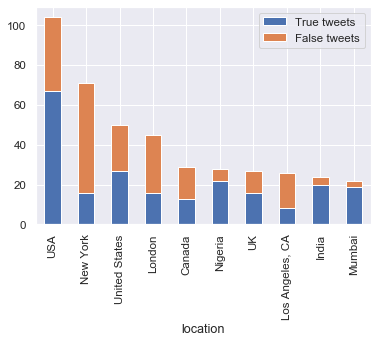

In [169]:
grouped2[["true","false"]].plot(kind="bar", stacked=True,color=("lightgreen","pink"),alpha=0.75)
plt.legend(("True tweets","False tweets"))

Largo promedio de las palabras 

In [162]:
def mean_len_word_per_text(text):
    
    words = text.split(" ")
    total_words = 0
    mean = 0

    for word in words:
        if not word is '':
            mean += len(word)
            total_words += 1

    mean /= total_words

    return round(mean,3)

In [163]:
tweets["mean_len_word"] = tweets["text"].apply(mean_len_word_per_text)
tweets

,id,keyword,location,text,target,located,mean_len_word
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0,4.385
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,4.571
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0,5.091
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0,7.125
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0,4.500
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,0,6.636
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0,5.300
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0,7.250
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0,6.263


Text(0, 0.5, 'Frecuencia de aparicion')

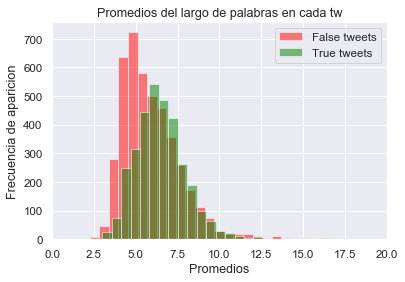

In [168]:
g = tweets["mean_len_word"].loc[tweets["target"] == 0].plot.hist(label= "False tweets", alpha = 0.5,color= "red",bins=100,legend= True)
g = tweets["mean_len_word"].loc[tweets["target"] == 1].plot.hist(label= "True tweets", alpha = 0.5,color= "green",bins=100,xlim = (0,20),legend= True)
g.set_title("Promedios del largo de palabras en cada tw")
g.set_xlabel("Promedios")
g.set_ylabel("Frecuencia de aparicion")
